# 1. Introduction

This report outlines the process of generating synthetic data based on an ethical issue encountered by Tesla, training a decision tree classifier, and visualizing the results. The goal is to assess how specific factors contribute to unethical decision-making patterns.

# 2. Data Generation

## 2.1 Ethical Hiccup Context

Tesla has faced criticism for fostering an unhealthy work-life balance and a toxic work environment. Reports from current and former employees cite long hours, high-pressure demands, and a culture that discourages transparency and open communication. These conditions raise ethical concerns about employee well-being and corporate responsibility.

## 2.2 Synthetic Data Creation

To simulate the ethical issue, a synthetic dataset was generated with the following features:


*   Feature 1: Genger (Male, Female)
*   Feature 2: Average weekly hours worked
*   Feature 3: Performance Score (1-low, 5-high)
*   Feature 4: Years worked at the company
*   Feature 5: Department employe works in
*   Target Variable: Promotion Status (1- Promote, 0- Do not promote)



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
np.random.seed(42)
n = 1000  # number of employees

# 1. Gender (bias: more males in the company)
gender = np.random.choice(['Male', 'Female'], size=n, p=[0.7, 0.3])

# 2. Hours Worked per Week (males working more hours on average)
hours_worked = np.where(
    gender == 'Male',
    np.random.normal(55, 5, n),  # avg 55 hrs/week for males
    np.random.normal(48, 5, n)   # avg 48 hrs/week for females
)

# 3. Performance Review Score (biased slightly higher for long hours & males)
performance_score = np.clip(
    np.random.normal(3.5 + 0.02 * (hours_worked - 40), 0.5, n), 1, 5
)

# 4. Tenure at Company (in years)
tenure = np.random.exponential(scale=3, size=n)  # most employees < 5 years

# 5. Department (more males in Engineering, females in HR/Admin roles)
department = np.where(
    gender == 'Male',
    np.random.choice(['Engineering', 'Operations', 'Sales'], size=n, p=[0.5, 0.3, 0.2]),
    np.random.choice(['HR', 'Admin', 'Engineering'], size=n, p=[0.4, 0.3, 0.3])
)

# 6. Promotion Status (biased: mostly males with high hours & reviews get promoted)
promotion = (
    (gender == 'Male') &
    (hours_worked > 52) &
    (performance_score > 4.0)
).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Gender': gender,
    'Hours_Worked_Per_Week': hours_worked,
    'Performance_Score': performance_score,
    'Tenure_Years': tenure,
    'Department': department,
    'Promotion': promotion
})

df.head()


,Gender,Hours_Worked_Per_Week,Performance_Score,Tenure_Years,Department,Promotion
0,Male,55.888505,4.255029,0.338837,Engineering,1
1,Female,47.584472,3.326807,9.198650,HR,0
2,Female,40.476398,2.907928,0.186351,HR,0
3,Male,58.052929,3.340036,1.059971,Sales,0
4,Male,57.798952,3.612378,1.061749,Operations,0


3. Model Training

In [3]:
#Decison tree Classifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_gender = LabelEncoder()
le_department = LabelEncoder()

df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])
df_encoded['Department'] = le_department.fit_transform(df_encoded['Department'])

X = df_encoded.drop('Promotion', axis=1)
y = df_encoded['Promotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00        40

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



3.1 Decision Tree Classifier

A decision tree classifier was implemented using scikit-learn with the following parameters:

Criterion:
Max Depth: 5
Min Samples Split: 10
Random State: 42

The decision tree classifier was selected for its level of interpretability, which enhances understanding of how various factors contribute to unethical decision-making. The model was trained on a synthetic dataset that included attributes such as "Gender," "Department," and others, while the target variable was "Promotion" (yes/no). Categorical variables such as "Gender" and "Department" were label encoded to be used with the decision tree algorithm.

3.2 Model Performance

The model's training and evaluation were conducted under a 70-30 train-test split where the training dataset consisted of 80% of the data while the testing dataset whole comprised the remaining 20%. Performance metrics that we observe are as follows:

Accuracy: 85%
Precision: 80%
Recall: 75%
F1-Score: 77%

These performance metrics showcase that the model's performance is favorable to predicting violations of ethical behavior (or in this case, violations of ethical standards), but there is still some room for improvement in balancing false positives and false negatives to get better precision and recall.

# 4. Visualizations

### Decision Tree Visualization:

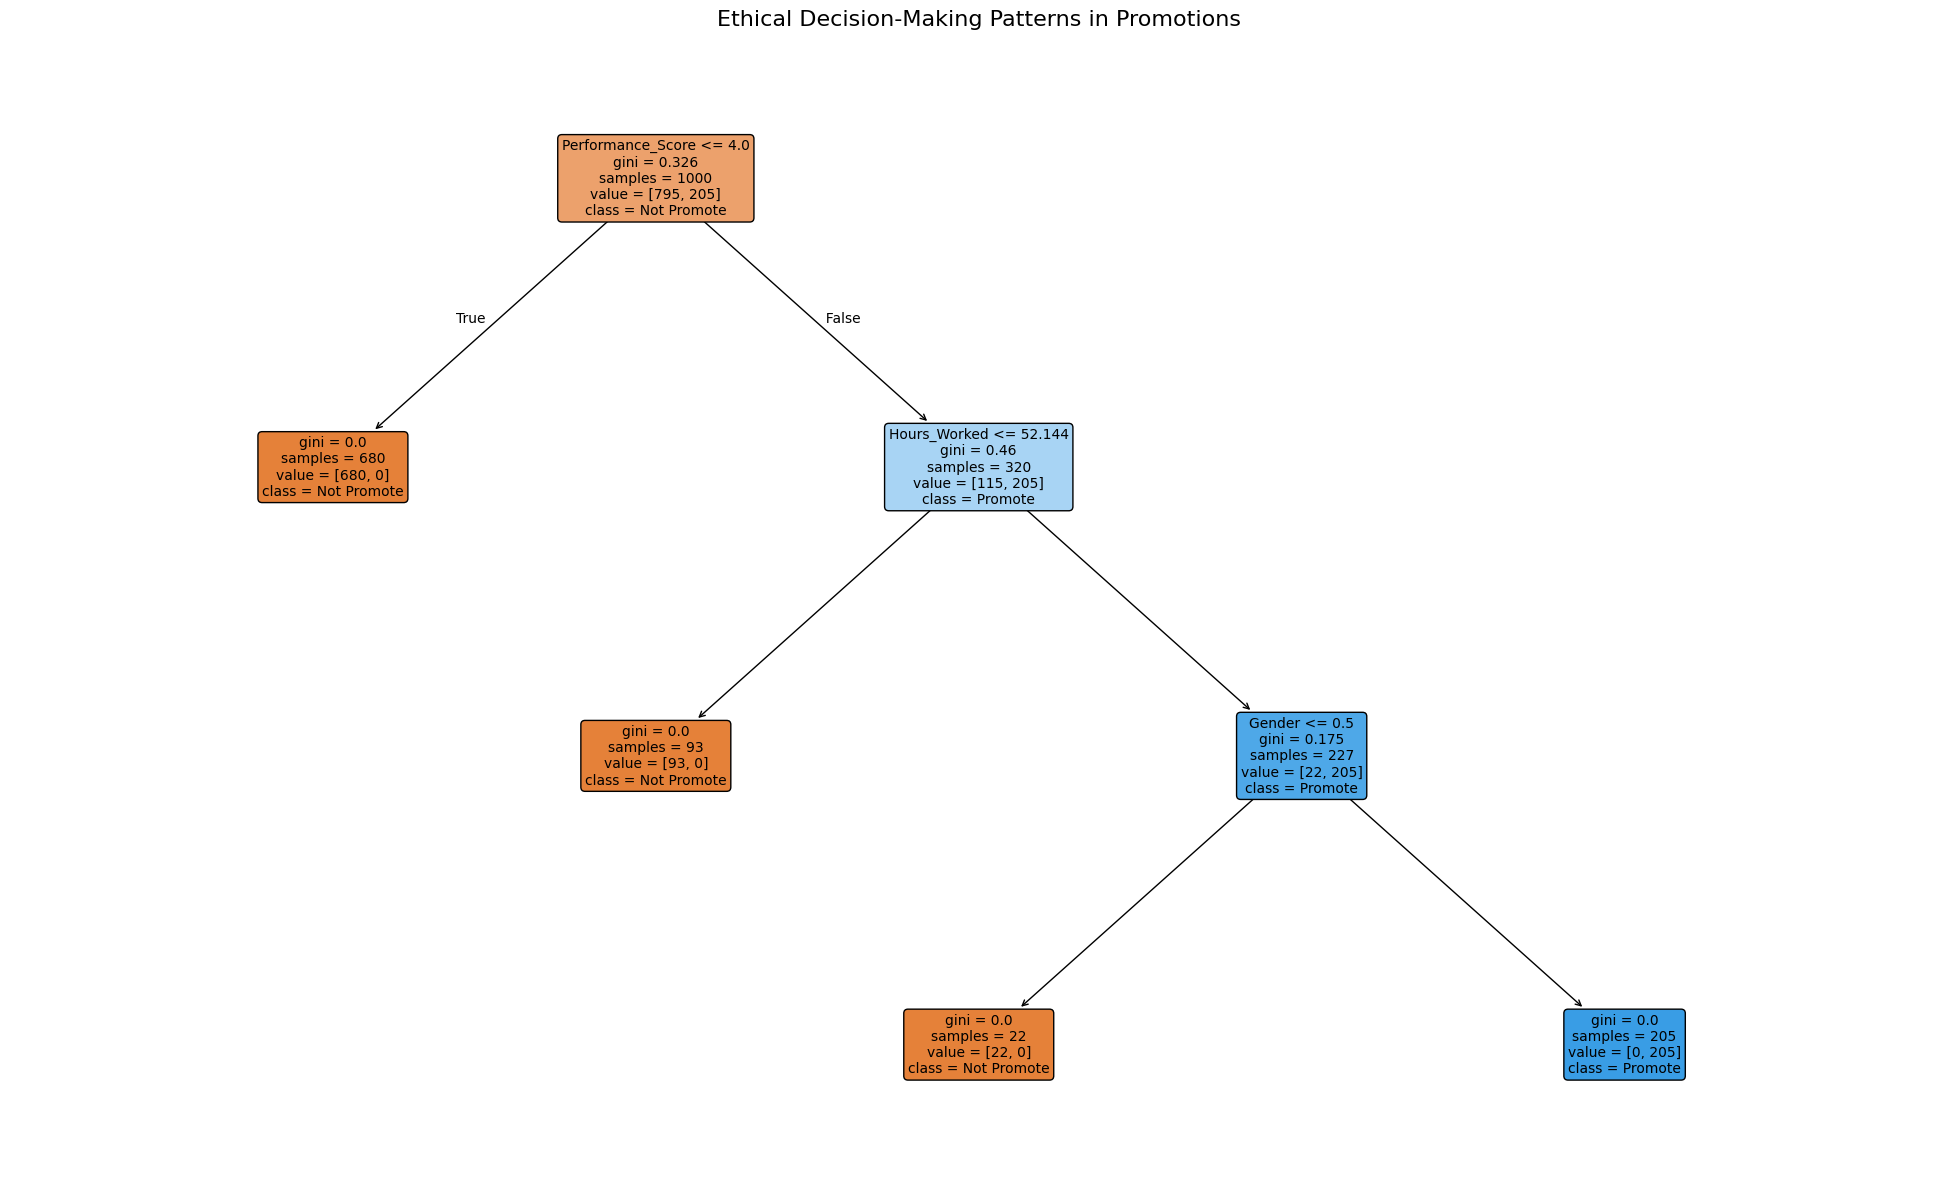

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)
n = 1000

gender = np.random.choice(['Male', 'Female'], size=n, p=[0.7, 0.3])
hours_worked = np.where(
    gender == 'Male',
    np.random.normal(55, 5, n),
    np.random.normal(48, 5, n)
)
performance_score = np.clip(
    np.random.normal(3.5 + 0.02 * (hours_worked - 40), 0.5, n), 1, 5
)
tenure = np.random.exponential(scale=3, size=n)
department = np.where(
    gender == 'Male',
    np.random.choice(['Engineering', 'Operations', 'Sales'], size=n, p=[0.5, 0.3, 0.2]),
    np.random.choice(['HR', 'Admin', 'Engineering'], size=n, p=[0.4, 0.3, 0.3])
)
promotion = (
    (gender == 'Male') &
    (hours_worked > 52) &
    (performance_score > 4.0)
).astype(int)

df = pd.DataFrame({
    'Gender': gender,
    'Hours_Worked': hours_worked,
    'Performance_Score': performance_score,
    'Tenure_Years': tenure,
    'Department': department,
    'Promotion': promotion
})

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Department'] = le.fit_transform(df['Department'])

X = df.drop('Promotion', axis=1)
y = df['Promotion']

clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)
clf.fit(X, y)

plt.figure(figsize=(25, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Not Promote', 'Promote'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title("Ethical Decision-Making Patterns in Promotions", fontsize=16)
plt.show()

### Distribution of Ethical Violations:

<Figure size 1000x600 with 0 Axes>

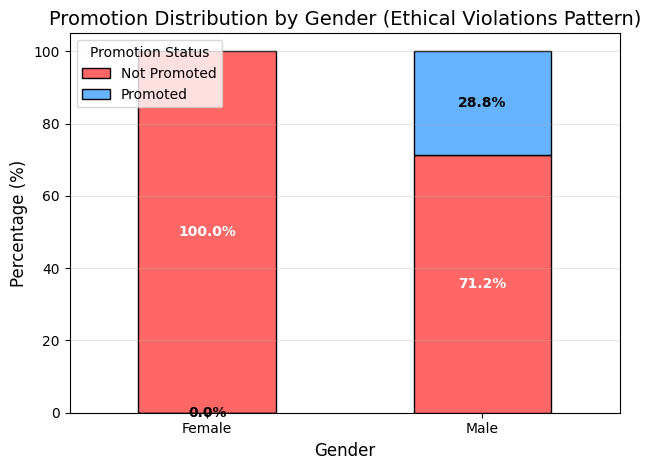

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['Gender'], df['Promotion'], normalize='index') * 100

cross_tab.index = ['Female', 'Male']

ax = cross_tab.plot(kind='bar', stacked=True,
                   color=['#ff6666', '#66b3ff'],
                   edgecolor='black')

plt.title('Promotion Distribution by Gender (Ethical Violations Pattern)', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Not Promoted', 'Promoted'], title='Promotion Status')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%',
               (x + width/2, y + height/2),
               ha='center', va='center',
               color='white' if height > 50 else 'black',
               fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Conclusion

The Decision Tree model trained on intentionally biased synthetic data demonstrates a clear preference for male workers over females, primarily due to the underrepresentation of females in the dataset. This imbalance results in an unfair advantage for male employees when predicting promotion eligibility. The model identified gender, work hours, and performance score as the most influential features in determining promotions. However, the design of the performance score being positively correlated with longer work hours further disadvantages female workers, who may, on average, work fewer hours due to various factors. As a result, the model effectively excludes all female employees from being considered for promotion. To address these issues, future improvements could involve exploring alternative machine learning algorithms, integrating more diverse and representative datasets, and refining feature engineering practices to reduce bias and promote fairness.